<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [2]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
import patsy
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
violations = pd.read_csv('/Users/amos/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/violations_parsed_words.csv')
violations.head(2)

/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,score,date,type,violation_count,days_since_first_violation,name,address,city,state,...,washed fruits,wastewater,wastewater contamination,wastewater disposal,water,water running,wiping,wiping cloths,worker,worker safety
0,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
1,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0


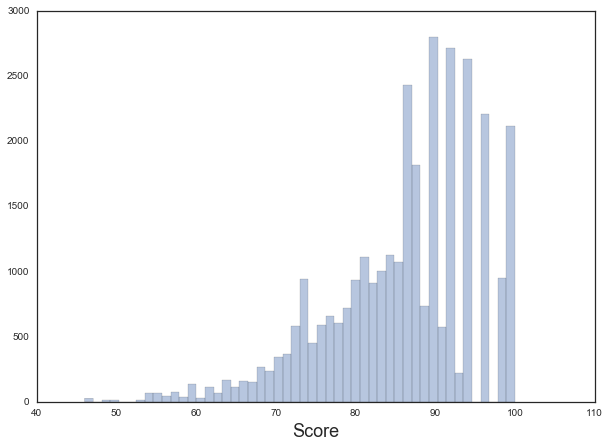

In [5]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style('white')

ax = sns.distplot(violations['score'], kde=False)

ax.set_xlabel('Score', fontsize=18)

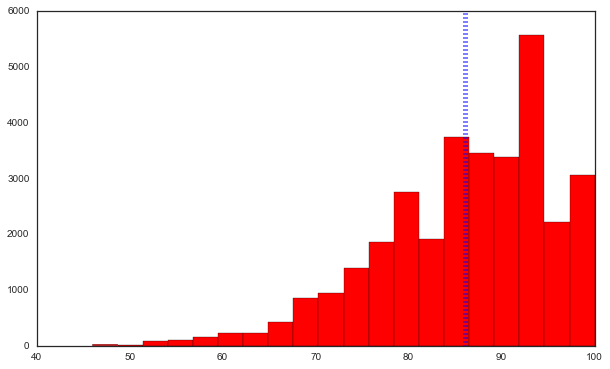

In [6]:
fig = plt.figure(figsize=(10,6))
result = plt.hist(violations.score, bins=20, color='r')
plt.axvline(violations.score.mean(), color='b', linestyle='dotted', linewidth=5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


## The violations data frame displays health code information on restaurants in San Francisco based on certain criteria to determine how well each food chain maintains a clean, safe and healthy workspace. I've chosen three criterias neighborhood, safety and sanitizer as a good model to predict the target variable score. 



In [8]:

formula = 'score ~ C(neighborhood) + C(safety) + C(sanitizer) - 1'

In [9]:
y, X = patsy.dmatrices(formula,data=violations,return_type='dataframe')
# Creating 2 design matrices or dataframes

In [10]:
print y.shape, X.shape

(32455, 1) (32455, 46)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)
# splitting the 2 design matrices into test/train datasets. 


In [12]:
lr = LinearRegression()
# Initialize linear regression model

In [13]:
model= lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [14]:
model= lr.fit(X_train,y_train) # Fit the regressional model with our trainning data set. (How we "teach" the model)

In [15]:
predictions = lr.predict(X_test) #See what the model thinks or make predictions on test data using the model created by the trainning data.

In [16]:
# using sklearn we find that the mean squared error between predicted y (applying X_test to our linear regression model
# from the trainning data set)  and the y_test array. 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

77.809789021624397

In [17]:
# Calculating the accuracy of my model: R^2 value
model.score(X_test,y_test)


0.09167837539338175

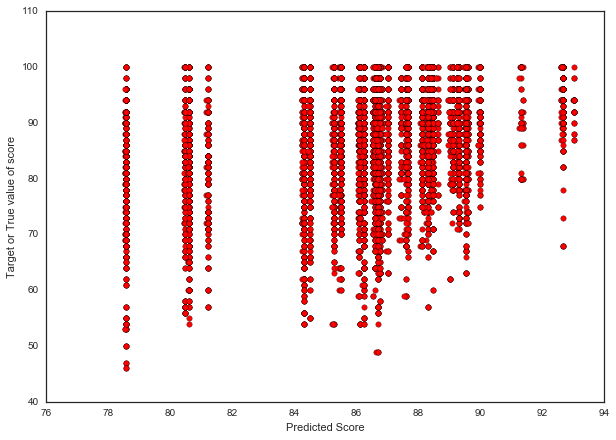

In [18]:
plt.scatter(predictions, y_test, s=30, c='r')

plt.xlabel("Predicted Score")
plt.ylabel("Target or True value of score")

plt.show()

In [19]:
print "MSE: %.2f" % mean_squared_error(y_test, predictions)
print "R^2: %.4f"% model.score(X_test,y_test)

MSE: 77.81
R^2: 0.0917


In [20]:
print len(y_test)
print len(predictions)

10711
10711


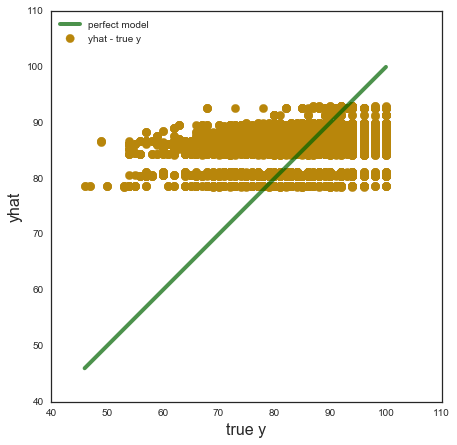

In [21]:
def plot_y_yhat(y, yhat):

    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()

    ax.scatter(y, yhat, color='darkgoldenrod', s=70, label='yhat - true y')

    max_val = np.max(y)
    min_val = np.min(y)

    ax.plot([min_val, max_val], [min_val, max_val], color='darkgreen',
            linewidth=4.0, alpha=0.7, label='perfect model')

    ax.set_xlabel('true y', fontsize=16)
    ax.set_ylabel('yhat', fontsize=16)

    plt.legend(loc='upper left')

    plt.show()
    
plot_y_yhat(y_test, predictions)

In [22]:
lm = LinearRegression()

Cross-validated scores: [ -4.15037426e+21  -1.97336217e+22  -6.57530489e+21  -2.24489584e+26
  -2.09746107e+23]
Cross-Predicted Accuracy: -4.6508525015e+25
Mean scores: -4.49459578512e+25


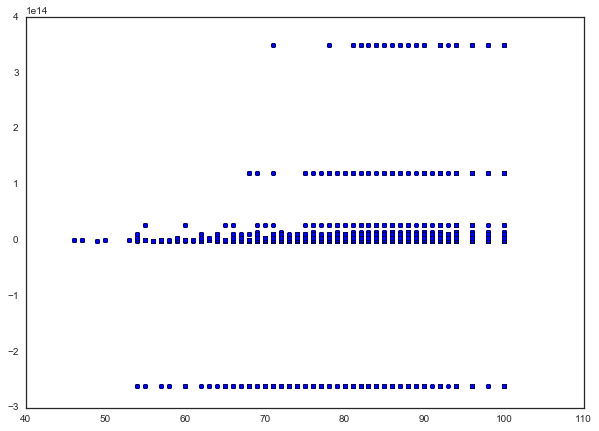

In [23]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=5)
print "Cross-validated scores:", scores

# # Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=5)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy   # our R^2 values
print "Mean scores:", np.mean(scores)

# Conclusion: Predicting score with predictor variables neighborhood, safety and sanitizer is not enough to create a model to predict future scores. 

## The range of our target data is [0,100] so the high mean squared error value is pretty bad. It's saying that my model is creating predictions that are on average 82.06 squared units away from the target values. 

## The low  R^2 shows my predictor variables are not good predictors in itself. 

In [24]:
# The combination of these three scores is not enough to model score

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [35]:
fire = pd.read_csv('/Users/amos/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv')
fire.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [26]:
fire_sub = fire[['Incident Number', 'Exposure Number', 'Call Number', 'Alarm DtTm',
                    'Arrival DtTm', 'Suppression Units', 'Suppression Personnel', 'EMS Units',
                    'EMS Personnel', 'Other Units', 'Other Personnel', 'Fire Fatalities', 
                    'Fire Injuries', 'Civilian Fatalities', 'Civilian Injuries']]
fire_sub.head()

,Incident Number,Exposure Number,Call Number,Alarm DtTm,Arrival DtTm,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries
0,9030109,0,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,1,5,0,0,0,0,0,0,0,0
1,13067402,0,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,3,11,0,0,0,0,0,0,0,0
2,12044490,0,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,3,10,0,0,0,0,0,0,0,0
3,13033326,0,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,3,10,0,0,0,0,0,0,0,0
4,11101416,0,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,2,9,0,0,0,0,0,0,0,0


In [27]:
fire_sub['Alarm DtTm'] = pd.to_datetime(fire_sub['Alarm DtTm'])
fire_sub['Arrival DtTm'] = pd.to_datetime(fire_sub['Arrival DtTm'])

/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
fire_sub = fire_sub.rename(columns = {'Incident Number': 'Incident_Number',
                                            'Exposure Number': 'Exposure_Number',
                                            'Call Number': 'Call_Number',
                                            'Alarm DtTm': 'Alarm_DtTm',
                                            'Arrival DtTm': 'Arrival_DtTm',
                                            'Suppression Units': 'Suppression_Units',
                                            'Suppression Personnel': 'Suppression_Personnel',
                                            'EMS Units': 'EMS_Units',
                                            'EMS Personnel': 'EMS_Personnel',
                                            'Other Units': 'Other_Units',
                                            'Other Personnel': 'Other_Personnel',
                                            'Fire Fatalities': 'Fire_Fatalities',
                                            'Fire Injuries': 'Fire_Injuries',
                                            'Civilian Fatalities': 'Civilian_Fatalities',
                                            'Civilian Injuries': 'Civilian_Injuries',
                                            'Response_Time': 'Response_Time'})

In [29]:
fire_sub.dropna(inplace = True)

fire_sub['Response_Time'] = fire_sub['Arrival_DtTm'] - fire_sub['Alarm_DtTm']

In [30]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

fire_sub['total_sec'] = fire_sub['Response_Time'].apply(str).apply(lambda x: x[7:]).apply(get_sec)

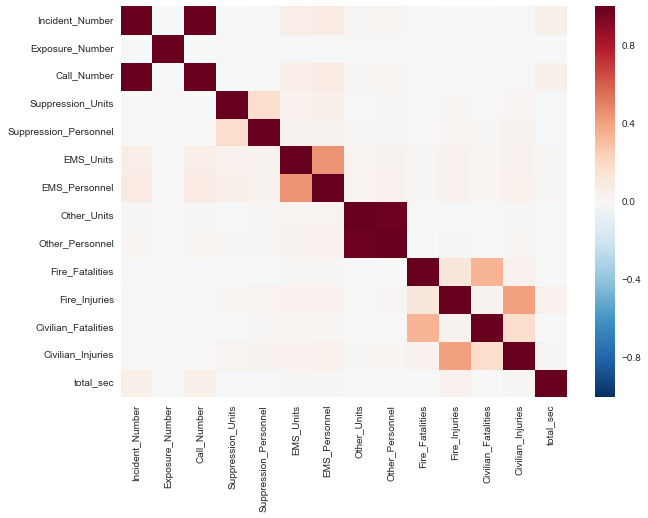

In [31]:
fire_corr = fire_sub.corr()
sns.heatmap(fire_corr)

In [32]:
fire_sub.head()

,Incident_Number,Exposure_Number,Call_Number,Alarm_DtTm,Arrival_DtTm,Suppression_Units,Suppression_Personnel,EMS_Units,EMS_Personnel,Other_Units,Other_Personnel,Fire_Fatalities,Fire_Injuries,Civilian_Fatalities,Civilian_Injuries,Response_Time,total_sec
0,9030109,0,91020273,2009-04-12 18:09:13,2009-04-12 18:13:45,1,5,0,0,0,0,0,0,0,0,00:04:32,272
1,13067402,0,131990117,2013-07-18 10:32:03,2013-07-18 10:37:15,3,11,0,0,0,0,0,0,0,0,00:05:12,312
2,12044490,0,121340051,2012-05-13 03:55:37,2012-05-13 04:01:57,3,10,0,0,0,0,0,0,0,0,00:06:20,380
3,13033326,0,130990286,2013-04-09 16:34:07,2013-04-09 16:39:31,3,10,0,0,0,0,0,0,0,0,00:05:24,324
4,11101416,0,113050357,2011-11-01 18:07:45,2011-11-01 18:10:17,2,9,0,0,0,0,0,0,0,0,00:02:32,152


In [37]:
#fire_sub.to_csv(path_or_buf='~/fire_sub.csv')
fire_sub = pd.read_csv('/Users/amos/fire_sub.csv')
fire_sub.head()

,Unnamed: 0,Unnamed: 0.1,Incident_Number,Exposure_Number,Call_Number,Alarm_DtTm,Arrival_DtTm,Suppression_Units,Suppression_Personnel,EMS_Units,EMS_Personnel,Other_Units,Other_Personnel,Fire_Fatalities,Fire_Injuries,Civilian_Fatalities,Civilian_Injuries,Response_Time,total_sec
0,0,0,9030109,0,91020273,2009-04-12 18:09:13,2009-04-12 18:13:45,1,5,0,0,0,0,0,0,0,0,0 days 00:04:32.000000000,272
1,1,1,13067402,0,131990117,2013-07-18 10:32:03,2013-07-18 10:37:15,3,11,0,0,0,0,0,0,0,0,0 days 00:05:12.000000000,312
2,2,2,12044490,0,121340051,2012-05-13 03:55:37,2012-05-13 04:01:57,3,10,0,0,0,0,0,0,0,0,0 days 00:06:20.000000000,380
3,3,3,13033326,0,130990286,2013-04-09 16:34:07,2013-04-09 16:39:31,3,10,0,0,0,0,0,0,0,0,0 days 00:05:24.000000000,324
4,4,4,11101416,0,113050357,2011-11-01 18:07:45,2011-11-01 18:10:17,2,9,0,0,0,0,0,0,0,0,0 days 00:02:32.000000000,152


# Hypothesis: Fire Fatalities and Civilian Fatalities are good indicators to total_sec. Total_sec indicates the response time between when the alarm was made to arrival.  

In [39]:
# time delta = injuries and fatalities
formula = 'total_sec ~ Fire_Fatalities + Civilian_Fatalities - 1'
y_f, X_f = patsy.dmatrices(formula,data=fire_sub,return_type='dataframe')
print y_f.shape, X_f.shape

(406718, 1) (406718, 2)


In [41]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_f,y_f,test_size=.33)

lr = LinearRegression()
model= lr.fit(Xf_train,yf_train)
predictions = lr.predict(Xf_test)
model= lr.fit(Xf_train,yf_train)
predictions = lr.predict(Xf_test)


In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yf_test, predictions)
#very bad MSE value

436348.12248767191

In [43]:
model.score(Xf_test,yf_test)

-1.7816777109436188e-05

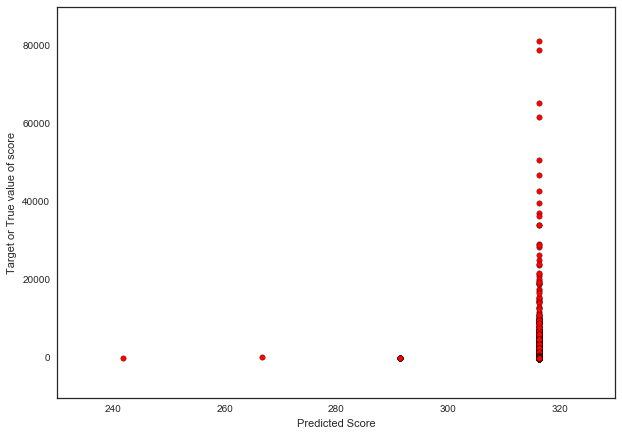

In [44]:
plt.scatter(predictions, yf_test, s=30, c='r')

plt.xlabel("Predicted value of score")
plt.ylabel("Target or True value of score")

plt.show()

## There shows an underfitting in our model. The predictor variables are not enough to create a good prediction on response time. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [26]:
park_info = pd.read_csv('/Users/amos/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/parks/park_info.csv')
park_scores = pd.read_csv('/Users/amos/Desktop/DSI-SF-2/datasets/san_francisco/san_francisco/parks/park_scores.csv')

In [27]:
parks = park_info.merge(park_scores, how='left', on='ParkID')


In [28]:
parks.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat,PSA,Park,FQ,Score
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY05Q4,0.655
2,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY06Q2,0.854
3,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY06Q4,0.673
4,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY07Q2,0.378


In [29]:
park_average = parks.groupby('ParkName',as_index=False).mean()
park_ave = park_average.drop(['Lat'], axis=1)

In [30]:
park_ave.dropna(axis=1)
park_ave.head()

,ParkName,Zipcode,Acreage,SupDist,ParkID,Score
0,10TH AVE/CLEMENT MINI PARK,94118.0,0.66,1.0,156.0,0.910440
1,15TH AVENUE STEPS,94122.0,0.26,7.0,185.0,NaN
2,24TH/YORK MINI PARK,94110.0,0.12,9.0,51.0,0.978033
3,29TH/DIAMOND OPEN SPACE,94131.0,0.82,8.0,194.0,0.896750
4,ADAM ROGERS PARK,94124.0,2.74,10.0,46.0,0.807344


In [31]:
park_ave = park_ave.dropna(subset=['Acreage', 'Score'])
park_ave.head(20)

,ParkName,Zipcode,Acreage,SupDist,ParkID,Score
0,10TH AVE/CLEMENT MINI PARK,94118.0,0.66,1.0,156.0,0.910440
2,24TH/YORK MINI PARK,94110.0,0.12,9.0,51.0,0.978033
3,29TH/DIAMOND OPEN SPACE,94131.0,0.82,8.0,194.0,0.896750
4,ADAM ROGERS PARK,94124.0,2.74,10.0,46.0,0.807344
5,ALAMO SQUARE,94117.0,12.70,5.0,117.0,0.896548
6,ALICE CHALMERS PLAYGROUND,94112.0,1.68,11.0,25.0,0.898375
7,ALICE MARBLE TENNIS COURTS,94109.0,0.84,2.0,151.0,0.988903
8,ALIOTO MINI PARK,94110.0,0.16,9.0,62.0,0.924276
9,ALLYNE PARK,94123.0,0.75,2.0,131.0,0.947469
10,ALTA PLAZA,94115.0,11.91,2.0,129.0,0.934778


In [32]:
park_ave.Score.isnull().sum()

0

In [33]:
print park_ave.Acreage.max()
print park_ave.Acreage.min()
print park_ave.Acreage.mean()
print park_ave.Acreage.shape
# Need to get rid of outliers

1031.98
0.0
16.4068852459
(183,)


In [34]:
sub_park = park_ave[park_ave['Acreage'] < 50]
print sub_park.Acreage.max()
print sub_park.Acreage.min()
print sub_park.Acreage.mean()
print sub_park.Acreage.shape

# The mask allowed me to get rid of outliers at the cost of 7 points in my data. 

36.08
0.0
3.64125
(176,)


In [35]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Hypothesis: for each park the average Acreage is a good predictor on average score.

I will test my hypothesis using a 6-fold cross validation on a Linear Regression model.

Cross-validated scores: [-0.0029249   0.00022769 -0.05986724 -0.02356209 -0.16646877 -0.03013974]
Cross-Predicted Accuracy: -0.0128429436511


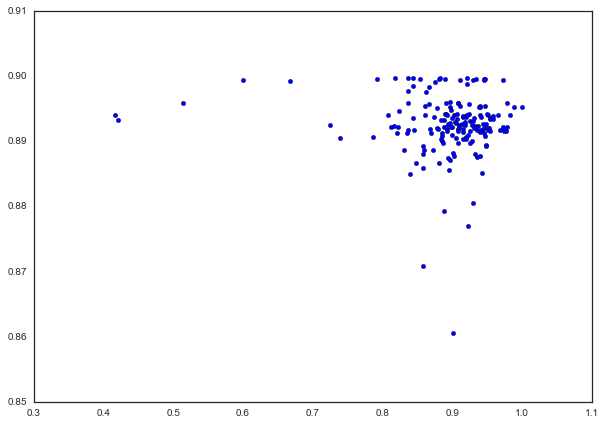

In [37]:
formula  =  "Score ~ Acreage"
y, X     =  patsy.dmatrices(formula, data=sub_park, return_type="dataframe")


lm = LinearRegression()


# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores

# Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

# Conclusion: Based on my negative cross-predicted accuracy the predictor variable is not enough to infer on my score.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?